In [1]:
import os 

In [2]:
intent_acc = []
slot_acc = []

with open('output/training_atis_250.txt', encoding='utf-8') as fin:
    lines = fin.readlines()
    for line in lines:
        if(line.startswith('Eval Results:')):
            temp = line.split(', ')
            for tt in temp:
                if(tt.startswith('intent_acc')):
                    intent_acc.append(float(tt.split(' ')[1]))
                elif(tt.startswith('slot_acc:')):
                    slot_acc.append(float(tt.split(' ')[1]))



In [3]:
print(intent_acc, slot_acc)

[87.6, 91.60000000000001, 94.8, 96.6, 96.3, 96.89999999999999, 97.2, 96.8, 96.5, 96.7, 97.39999999999999, 96.8, 96.3, 97.1, 96.89999999999999, 96.89999999999999, 97.0, 96.6, 97.2, 96.7, 97.0, 97.2, 96.89999999999999, 96.7, 96.6, 96.8, 97.1, 97.3, 97.0, 97.2, 97.5, 96.7, 96.89999999999999, 97.0, 97.1, 96.89999999999999, 97.0, 97.0, 97.3, 96.89999999999999, 96.7, 97.1, 97.0, 96.89999999999999, 97.39999999999999, 97.1, 97.1, 96.8, 96.89999999999999, 97.5, 96.89999999999999, 97.2, 97.2, 96.89999999999999, 96.89999999999999, 96.89999999999999, 97.3, 97.0, 96.89999999999999, 97.2, 97.0, 97.0, 97.6, 97.1, 96.7, 97.2, 97.3, 96.89999999999999, 96.6, 96.7, 97.3, 97.2, 97.0, 97.1, 97.1, 96.89999999999999, 97.39999999999999, 97.39999999999999, 97.1, 97.5, 96.6, 97.3, 97.0, 97.1, 97.1, 97.0, 96.8, 97.1, 97.2, 97.2, 97.5, 97.3, 97.5, 97.1, 97.39999999999999, 97.0, 96.7, 97.2, 97.1, 96.7, 97.2, 96.6, 97.0, 97.39999999999999, 97.1, 97.2, 97.0, 96.8, 97.0, 97.0, 97.1, 97.1, 96.8, 97.1, 96.8, 96.8999999

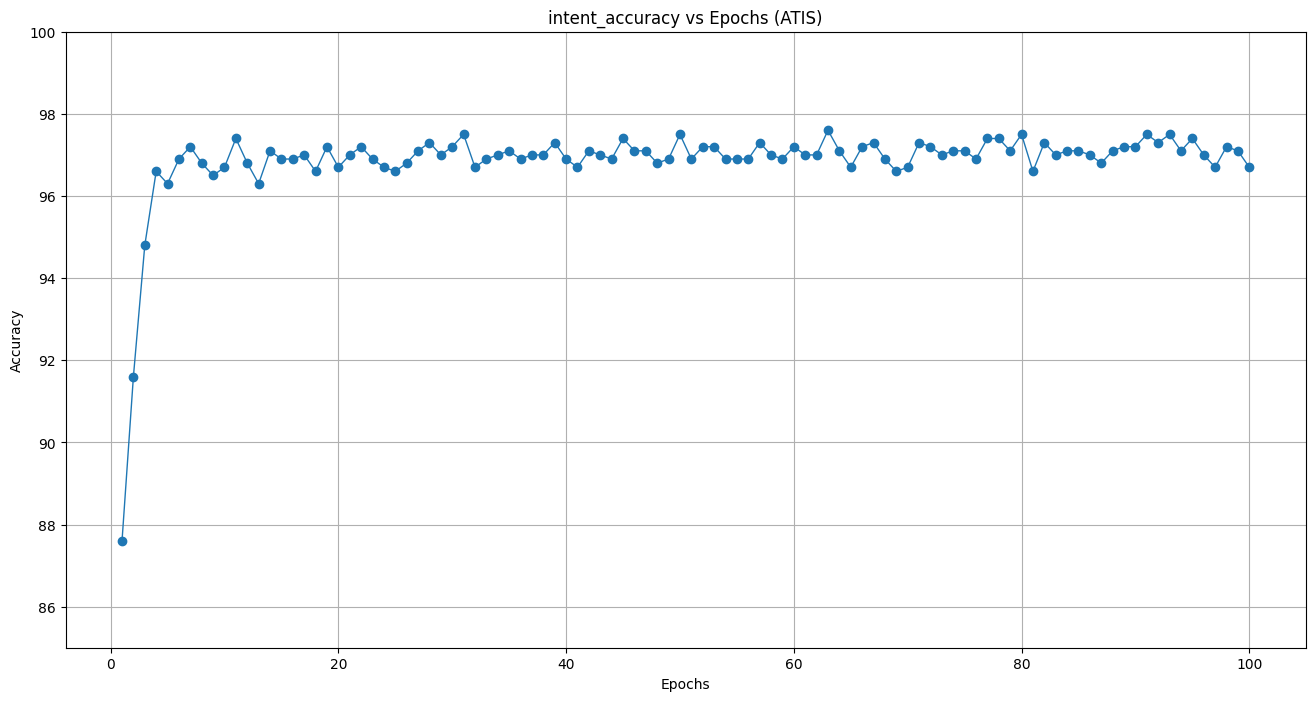

In [8]:
epochs = list(range(1, 251))  
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(epochs[:100], intent_acc[:100], marker='o', linestyle='-', linewidth=1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('intent_accuracy vs Epochs (ATIS)')
plt.ylim(85, 100)
plt.grid(True)
plt.show()

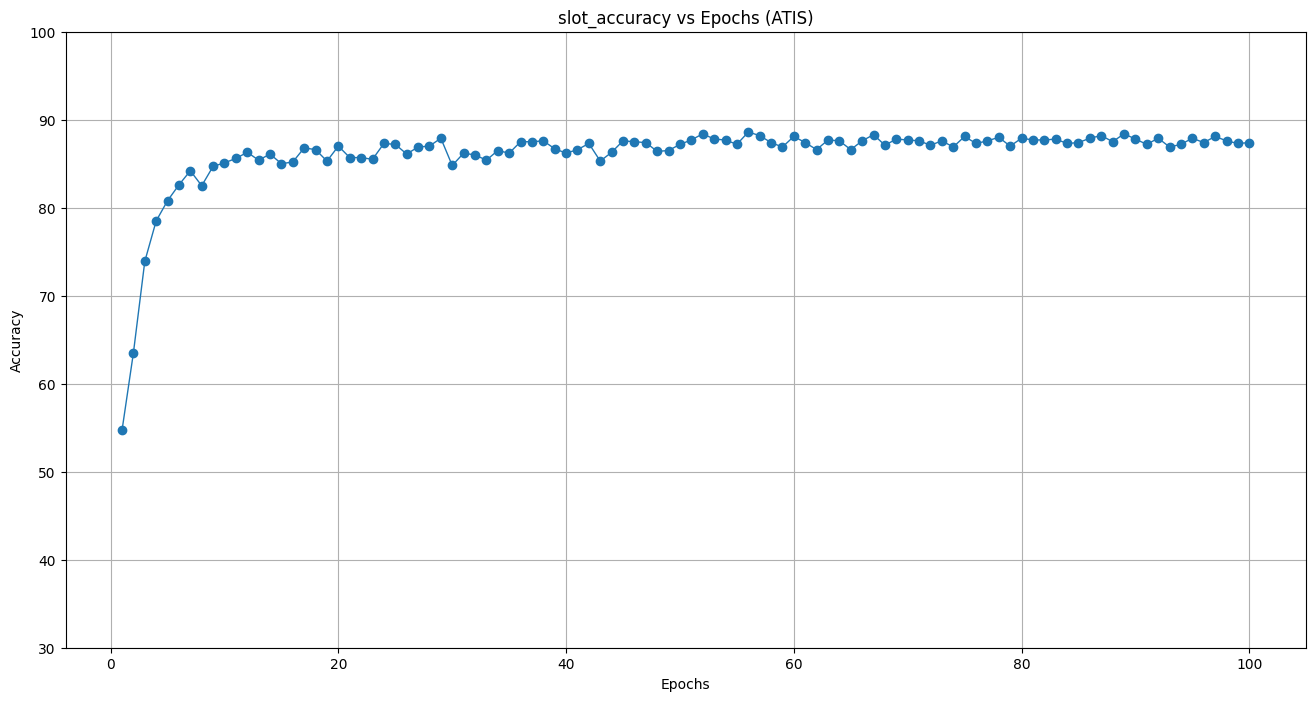

In [9]:
plt.figure(figsize=(16, 8))
plt.plot(epochs[:100], slot_acc[:100], marker='o', linestyle='-', linewidth=1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('slot_accuracy vs Epochs (ATIS)')
plt.ylim(30, 100)
plt.grid(True)
plt.show()

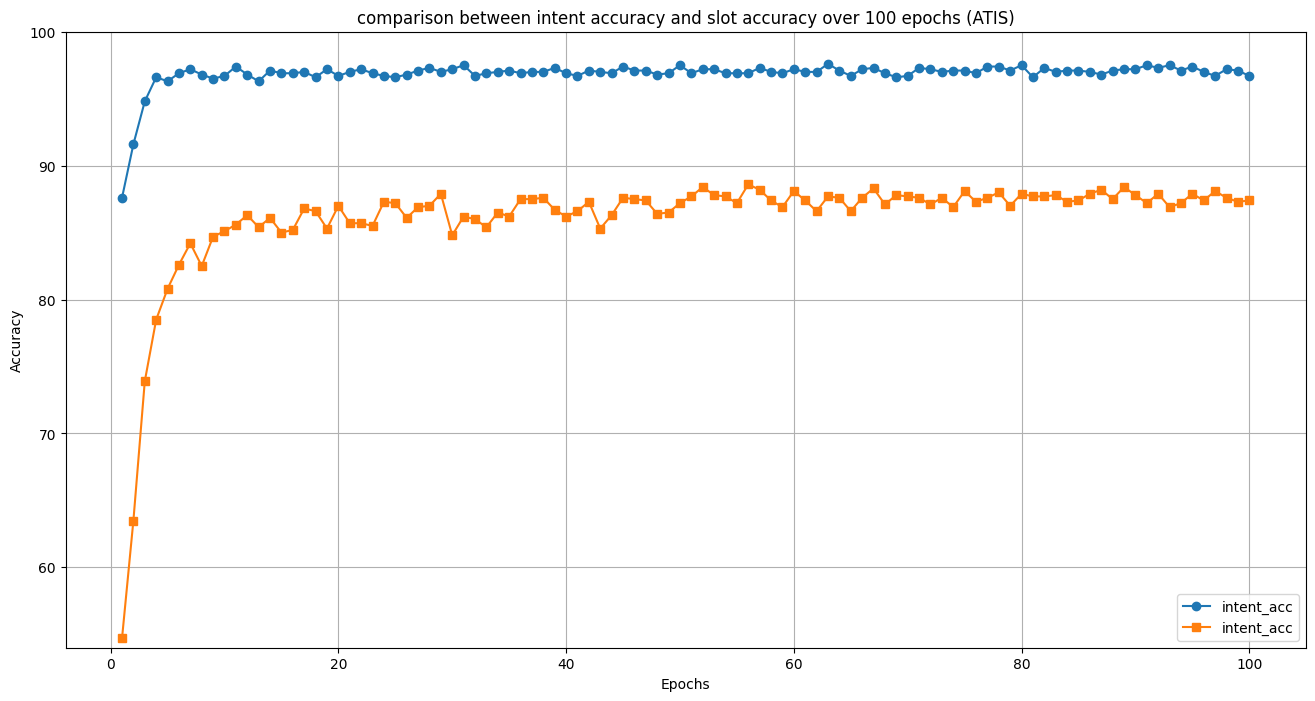

In [13]:
plt.figure(figsize=(16, 8))
plt.plot(epochs[:100], intent_acc[:100], label='intent_acc', marker='o', linestyle='-')
plt.plot(epochs[:100], slot_acc[:100], label='intent_acc', marker='s', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('comparison between intent accuracy and slot accuracy over 100 epochs (ATIS)')
plt.ylim(54, 100)
plt.grid(True)
plt.show()

In [24]:
sentence_length = []
slot_length = []
prediction_time = []

with open('prediction_atis_250.txt', encoding='utf-8') as fin:
    lines = fin.readlines()
    for line in lines:
        if(line.startswith('sentence length')):
            temp = line.split(' ')
            sentence_length.append(int(temp[-1]))
        elif(line.startswith('slot length')):
            temp = line.split(' ')
            slot_length.append(int(temp[-1]))
        elif(line.startswith('time_taken for one prediction')):
            temp = line.split(' ')
            prediction_time.append(float(temp[-1]))

print(len(prediction_time), len(slot_length), len(prediction_time))
            

501 501 501


In [37]:
prediction_time = prediction_time[1:101]
slot_length = slot_length[1:101]
sentence_length = sentence_length[1:101]

In [38]:
sen_len_to_time = []
for i in range(len(prediction_time)):
    if(prediction_time[i]>0.1):
        print(1)
    else:    
        sen_len_to_time.append([sentence_length[i], prediction_time[i]])

sorted_arr = sorted(sen_len_to_time)

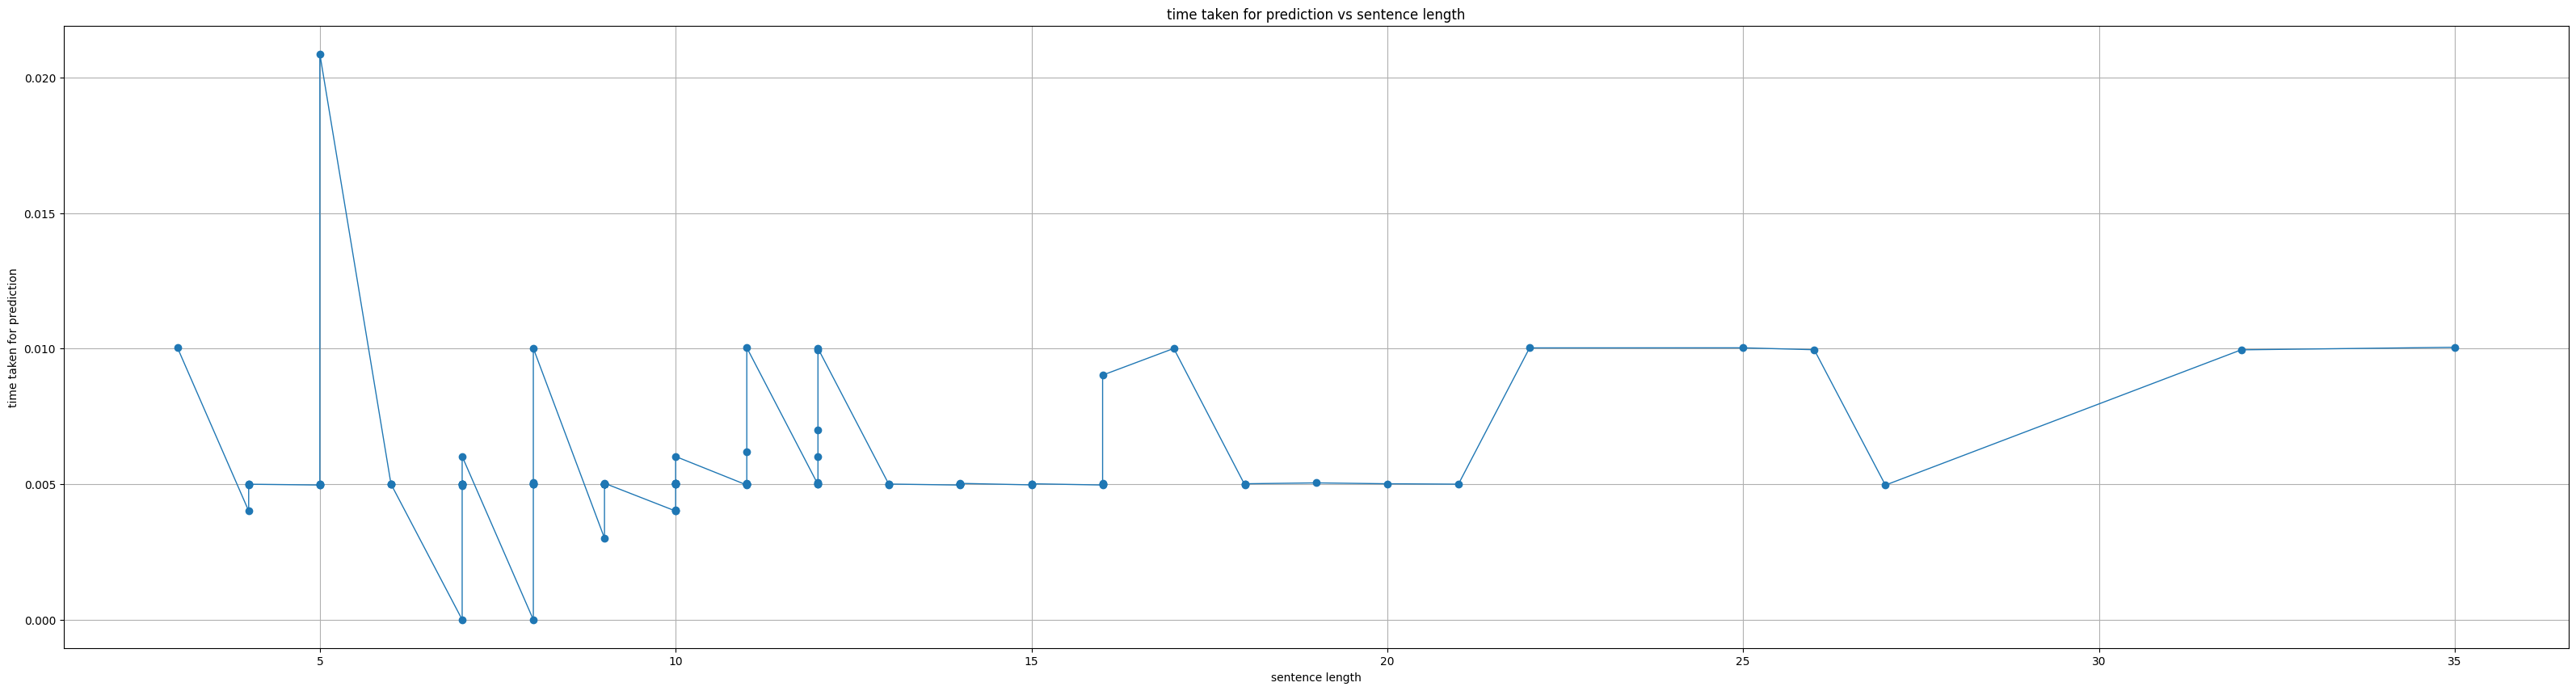

In [39]:
import numpy as np 

plt.figure(figsize=(40, 10))
plt.plot(np.array(sorted_arr).T[0], np.array(sorted_arr).T[1], marker='o', linestyle='-', linewidth=1)
plt.xlabel('sentence length')
plt.ylabel('time taken for prediction')
plt.title('time taken for prediction vs sentence length')
plt.grid(True)
plt.show()

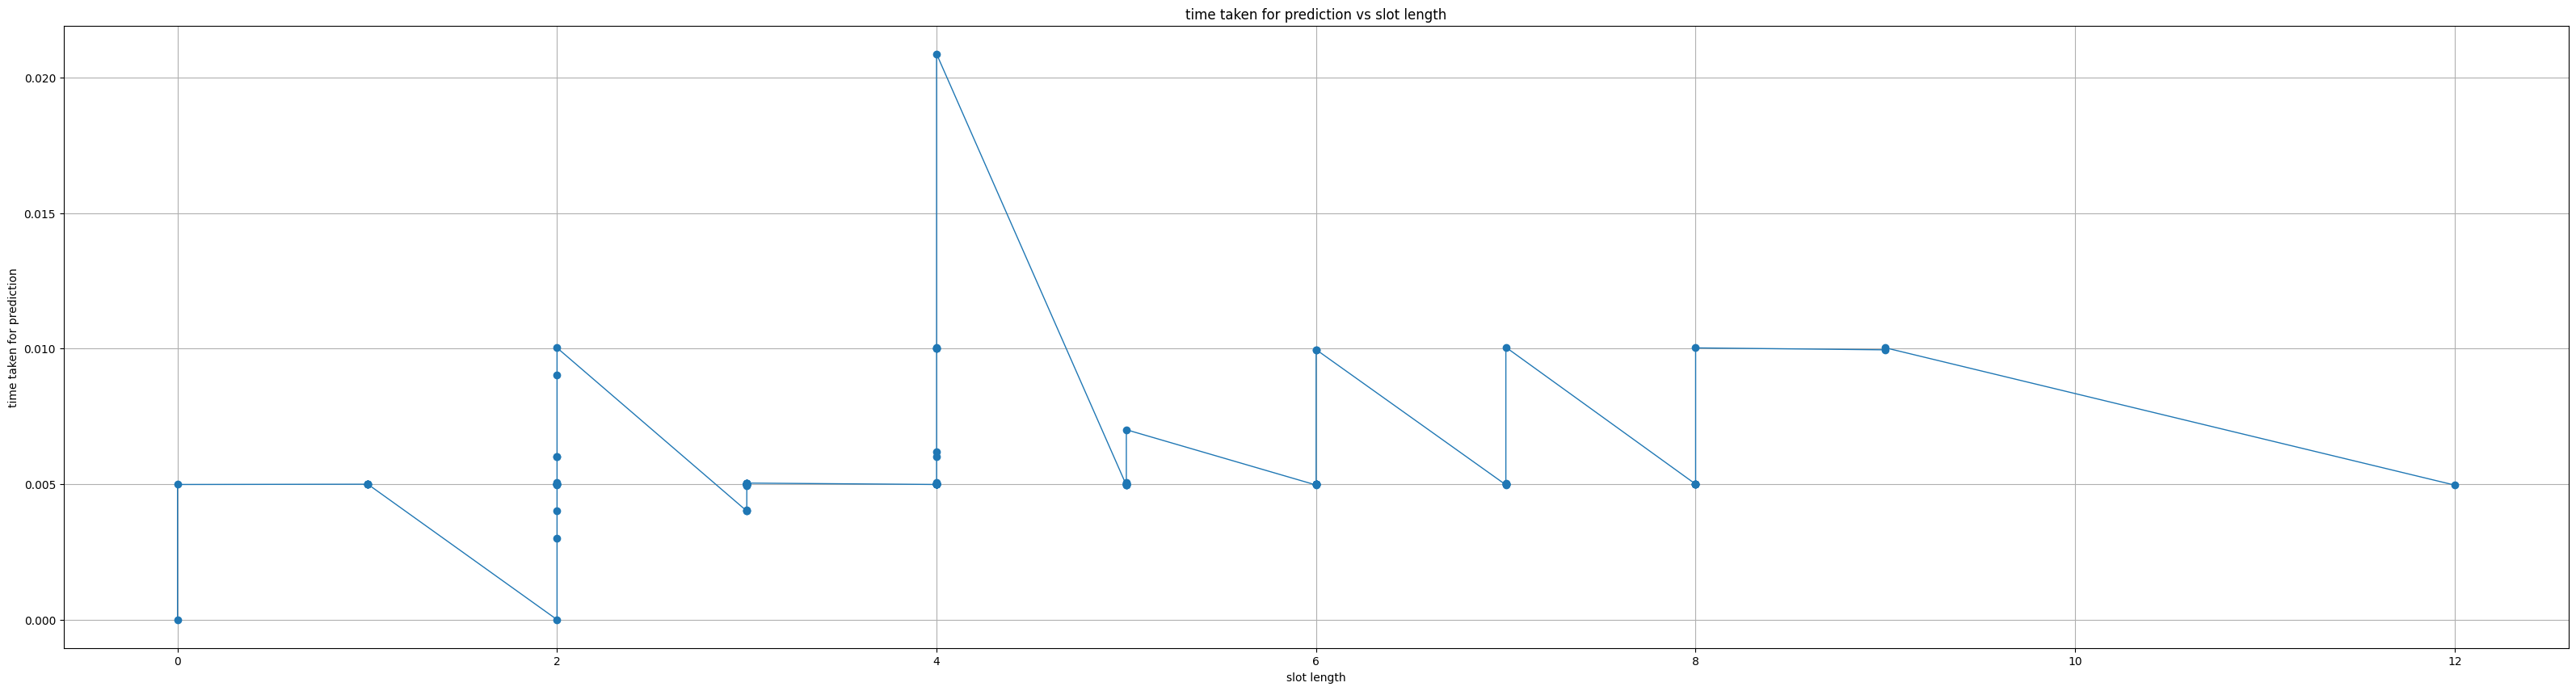

In [48]:
slot_len_to_time = []
for i in range(len(prediction_time)):
    if(prediction_time[i]>0.1):
        print(1)
    else:    
        slot_len_to_time.append([slot_length[i], prediction_time[i]])

sorted_arr = sorted(slot_len_to_time)
plt.figure(figsize=(40, 10))
plt.plot(np.array(sorted_arr).T[0], np.array(sorted_arr).T[1], marker='o', linestyle='-', linewidth=1)
plt.xlabel('slot length')
plt.ylabel('time taken for prediction')
plt.title('time taken for prediction vs slot length')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


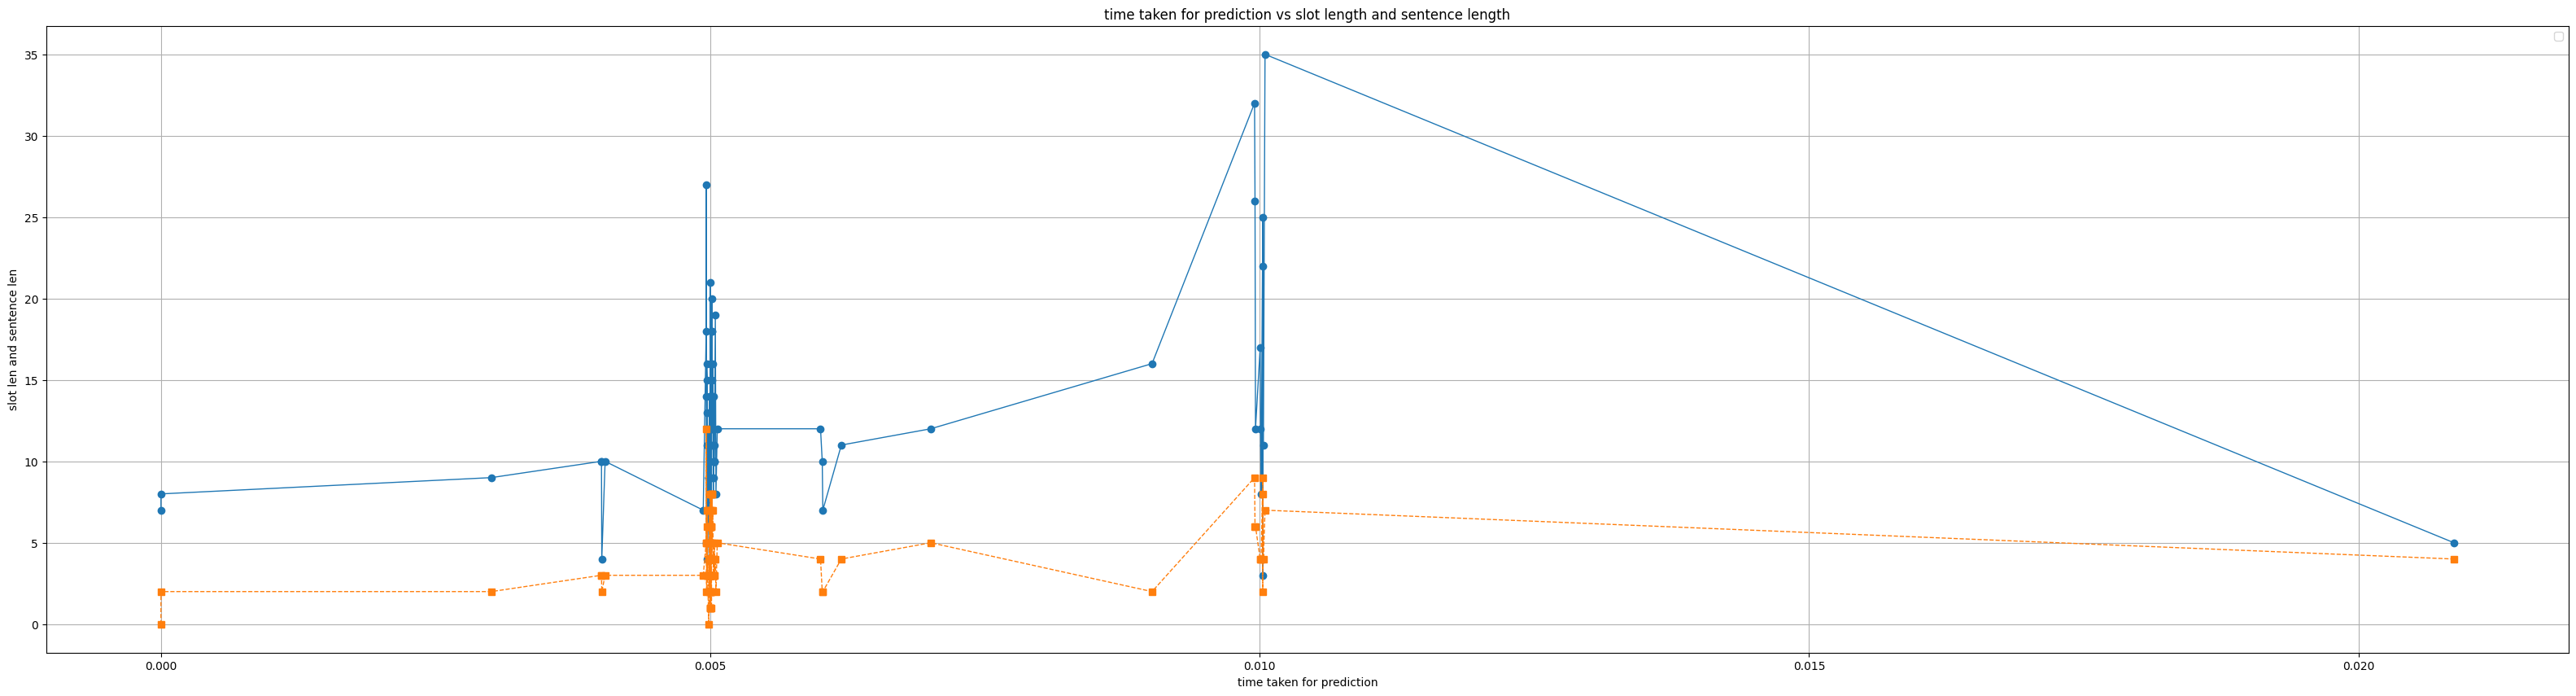

In [45]:
time_sen_slot = []
for i in range(len(prediction_time)):
    if(prediction_time[i]>0.1):
        print(1)
    else:
        time_sen_slot.append([prediction_time[i], sentence_length[i], slot_length[i]])

sorted_arr = sorted(time_sen_slot)
plt.figure(figsize=(40, 10))
plt.plot(np.array(sorted_arr).T[0], np.array(sorted_arr).T[1], marker='o', linestyle='-', linewidth=1)
plt.plot(np.array(sorted_arr).T[0], np.array(sorted_arr).T[2], marker='s', linestyle='--', linewidth=1)
plt.xlabel('time taken for prediction')
plt.ylabel('slot len and sentence len')
plt.title('time taken for prediction vs slot length and sentence length')
plt.legend()
plt.grid(True)
plt.show()